<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/SLAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[-4.00000000e+00  4.00000000e+00]
 [-3.00000000e+00  4.00000000e+00]
 [-2.00000000e+00  4.00000000e+00]
 [-1.00000000e+00  4.00000000e+00]
 [ 0.00000000e+00  4.00000000e+00]
 [ 1.00000000e+00  4.00000000e+00]
 [ 2.00000000e+00  4.00000000e+00]
 [ 3.00000000e+00  4.00000000e+00]
 [ 4.00000000e+00  4.00000000e+00]
 [ 4.00079633e+00  3.00000032e+00]
 [ 4.00159265e+00  2.00000063e+00]
 [ 3.00159392e+00  1.99840798e+00]
 [ 2.00159519e+00  1.99681533e+00]
 [ 1.00159646e+00  1.99522268e+00]
 [ 1.59772651e-03  1.99363002e+00]
 [-9.98401005e-01  1.99203737e+00]
 [-1.99839974e+00  1.99044472e+00]
 [-2.99839847e+00  1.98885206e+00]
 [-3.99839720e+00  1.98725941e+00]
 [-3.99760087e+00  9.87259728e-01]
 [-3.99680455e+00 -1.27399551e-02]
 [-2.99680455e+00 -1.27399551e-02]]
[[[ 9.21954446 -1.78946527]
  [12.04159458 -0.84415399]
  [ 8.06225775  0.12435499]
  [ 2.23606798  2.67794504]]

 [[ 9.48683298 -1.89254688]
  [11.40175425 -0.90975316]
  [ 7.07106781  0.14189705]
  [ 3.16227766  2.8198421 ]]

 

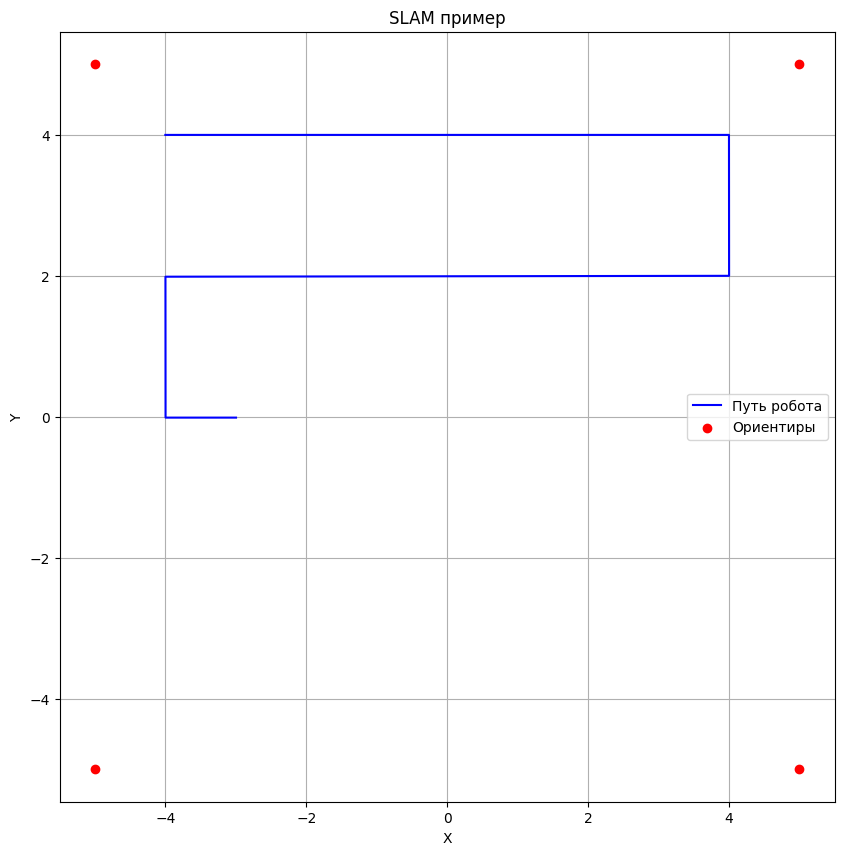

In [1]:
import numpy as np
import matplotlib.pyplot as plt



t = 1         # Время между шагами
velocity = 1  # Скорость робота


landmarks = np.array([[-5, -5], [5, -5], [5, 5], [-5, 5]]) # Координаты препятствий


robot_pose = np.array([-4, 4, 0])  # Начальные координаты
robot_path = [[-4, 4]]             # Путь

measurements = []

def move_robot(robot_pose, velocity, angle):
    """Обновление позы робота на основе скорости и угловой скорости."""
    x, y, theta = robot_pose
    x += velocity * np.cos(theta) * t
    y += velocity * np.sin(theta) * t
    theta += angle * t
    return np.array([x, y, theta])

def observe_landmarks(robot_pose, landmarks):
    """Симуляция наблюдений за ориентирами."""
    x, y, theta = robot_pose
    measurements = []
    for landmark in landmarks:
        lx, ly = landmark
        distance = np.sqrt((lx - x)**2 + (ly - y)**2)
        angle = np.arctan2(ly - y, lx - x) - theta
        measurements.append((distance, angle))
    return measurements


list_angles = [0, 0, 0, 0, 0, 0, 0, -1.57, 0, -1.57, 0, 0, 0, 0, 0, 0, 0, 1.57, 0, 1.57, 0]


for angle in list_angles:
    robot_pose = move_robot(robot_pose, velocity, angle)
    robot_path.append(robot_pose[:2])
    measurements.append(observe_landmarks(robot_pose, landmarks))


robot_path = np.array(robot_path)
measurements = np.array(measurements)

print(robot_path)
print(measurements)


plt.figure(figsize=(10, 10))
plt.plot(robot_path[:, 0], robot_path[:, 1], label='Путь робота', color='blue')
plt.scatter(landmarks[:, 0], landmarks[:, 1], label='Ориентиры', color='red')
plt.title('SLAM пример')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()